In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import plotly.graph_objects as go
import plotly.express as px

In [31]:
acc = pd.read_csv('accelerations.csv', header=0)
t = pd.read_csv('t.csv', header=0)

acc.shape, t.shape

((32768, 35), (1, 32768))

Measurement info

In [32]:
dt = t.iloc[0, 1] - t.iloc[0, 0]
F = 1 / dt
N = len(t.iloc[0, :])
df = F / N

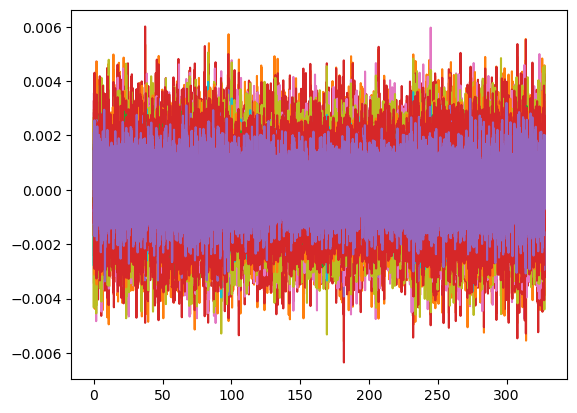

In [33]:
n_d = 35 # number of sensors
for i in range(n_d):
    plt.plot(t.iloc[0, :], acc.iloc[:, i], label=f'Sensor {i+1}')
    

Splitting in segments

In [34]:
# Split the data into 'n_seg' segments and perform the FFT for each segment
n_seg = 3
# New sampling parameters
N_seg = N / n_seg
N_seg_counter = int(N_seg/2) # again only the positive frequencies
t_seg = np.arange(0, N_seg, dt)
df_seg = F / N_seg
freq_seg = np.arange(-F/2, F/2, df_seg)

# Split the data
data_seg = []
data_seg_fft = []
for i in range(n_d):
    data_split = np.array_split(acc.iloc[:, i], n_seg)
    # Store all segments in a list
    data_seg.append([data_split[j] for j in range(n_seg)])
    data_seg_fft.append([fft(data_seg[i][j], axis=0) for j in range(n_seg)])
    # print(data_seg_fft[0].shape) # Check the shape of each matrix in the list


# plt.plot(freq_seg, np.abs(data_seg_fft[0][0]))
# print(data_seg_fft[0][0])

c:\Users\Nigel\miniconda3\envs\CIEM5000\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [35]:
# for i in range(n_d):
#     plt.figure()
#     plt.plot(freq, np.abs(a_freq[:, i]), label=f'Sensor {i+1}')
#     plt.xlim(0, F/2)

SVD

In [36]:
# Initialize matrices for storing the singular values en left/right singular vectors at each frequency
U_omega = np.zeros((N_seg_counter, n_d, n_d), dtype=np.complex128)
V_omega = np.zeros((N_seg_counter, n_d, n_d), dtype=np.complex128)
S_omega = np.zeros((n_d, N_seg_counter))

# Approximate the output spectral density matrix (Sdd) and decompose
for i in range(N_seg_counter):
     Sdd = np.zeros((n_d, n_d), dtype=np.complex128)
     for seg in data_seg_fft: # Looping over the segments to calculate Sdd as an average
          arr_seg = np.reshape(seg[i, :], (n_d, 1)) # reshape the applicable row in the list to a 10x1 array
          Sdd += arr_seg @ np.conj(arr_seg.T)  # (n_d, n_d)
     
     U, S, V = np.linalg.svd(Sdd) # Perform the SVD
     U_omega[i] = U
     V_omega[i] = V
     S_omega[:, i] = S

TypeError: list indices must be integers or slices, not tuple